In [1]:
''' Compiling all of the initial code from the project_start '''

!pip install uproot awkward 
from uproot_io import Events, View
import numpy as np
import matplotlib as plt

events = Events("CheatedRecoFile_10.root")


import matplotlib.pyplot as plt
titlesize = 20
labelsize = 14

import os

def save_plot(fig, directory, filename):
    if not os.path.exists(directory):
        os.mkdir(directory)
    fig.savefig(f'{directory}/{filename}.png', bbox_inches='tight', dpi=200, facecolor='w')
    fig.savefig(f'{directory}/{filename}.jpg', bbox_inches='tight', dpi=200)
    fig.savefig(f'{directory}/{filename}.svg', bbox_inches='tight', dpi=200)

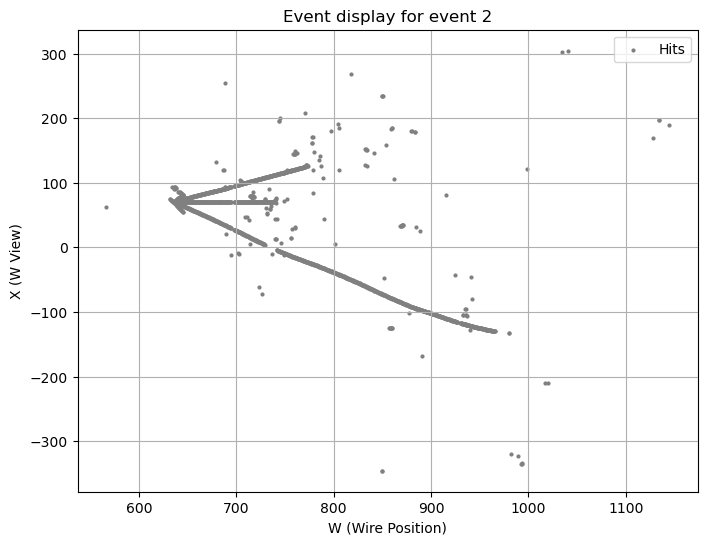

In [2]:
from features import event_view # doesnt work for some reason, doesnt like plt

event_view(events, 2)

In [3]:
def plot_idx_adc_bounded(events, event_idx, adc_min, adc_max): # proof of concept, due to the physics will only need a minimum for now
    
    # Finding x/w hits and ADC values for a single event
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    adc_values = events.reco_adcs_w[event_idx]

    if min(adc_values) > adc_min:
        adc_min = min(adc_values)

    if max(adc_values) < adc_max:
        adc_max = max(adc_values)
    # Filter through adc values to include only those in [adc_min, adc_max]
    adc_mask = (adc_values >= adc_min) & (adc_values <= adc_max)
    
    # Apply the mask to w_hits, x_hits, and adc_values
    filtered_w_hits = w_hits[adc_mask]
    filtered_x_hits = x_hits[adc_mask]
    filtered_adc_values = adc_values[adc_mask]

    # Plot if there are sufficient hits after filtering
    if len(filtered_w_hits) == len(filtered_x_hits) and len(filtered_w_hits) > 5:
        plt.figure(figsize=(8,6))
        scatter = plt.scatter(filtered_w_hits, filtered_x_hits, c=filtered_adc_values, cmap='viridis', s=4, alpha=0.9, vmin=min(adc_values), vmax=max(adc_values)) # Scatter plot
        plt.colorbar(scatter, label='ADC (Energy Deposit)') # Generating Color Bar
        plt.title(f'View for particle idx {event_idx} for ADCs in [{adc_min:.1f}, {adc_max:.1f}]')
        plt.ylabel('X (W View)')
        plt.xlabel('W (Wire Position)')
        plt.grid(True)
        plt.show()
    else:
        print('Less than 5 hits in event, not sufficient to plot.')

event 171: 3.5878701210021973
event 299: 2.286675214767456
event 410: 8.462183952331543
event 487: 1.1068671941757202
event 521: 2.083752155303955
event 535: 2.051788806915283
event 666: 6.6919941902160645
event 729: 1.2617672681808472
event 767: 1.925671100616455
event 907: 1.2241830825805664
event 926: 0.21563231945037842
event 927: 10.026622772216797
event 1017: 1.2949297428131104
event 1096: 10.92508602142334
event 1189: 8.326533317565918
event 1431: 3.0454459190368652
event 1442: 2.093808174133301
event 1485: 4.06141996383667
event 1518: 6.320855140686035
event 1681: 2.066805601119995
event 1713: 1.8539491891860962
event 1913: 7.217302322387695
event 2032: 1.5343056917190552
event 2047: 1.3431376218795776
event 2157: 0.915949285030365
event 2385: 3.5643723011016846
event 2410: 1.6632649898529053
event 2548: 4.030008792877197
event 2805: 0.9263349175453186
event 2876: 5.232918739318848
event 3011: 9.484386444091797
event 3075: 8.367809295654297
event 3094: 2.60107159614563
event 36

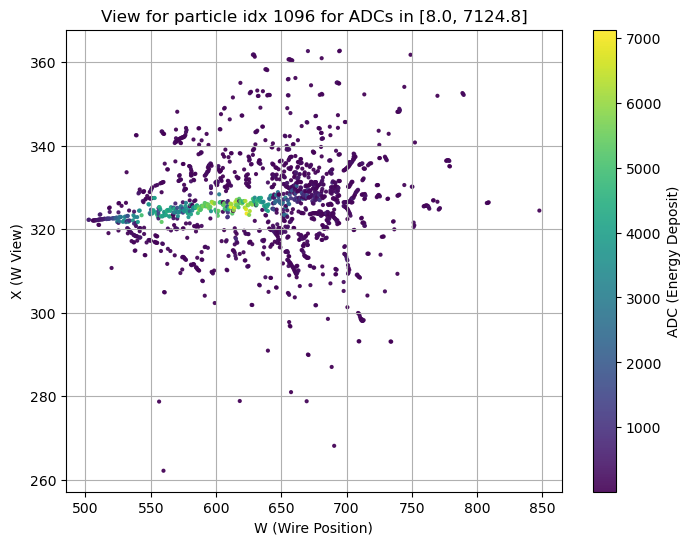

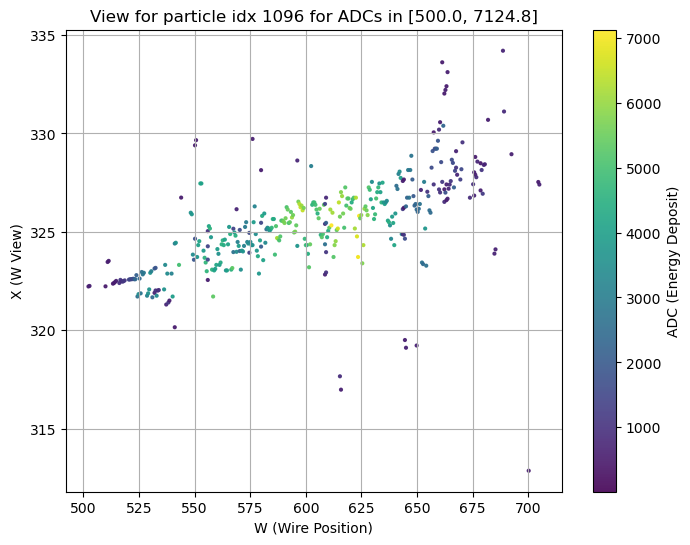

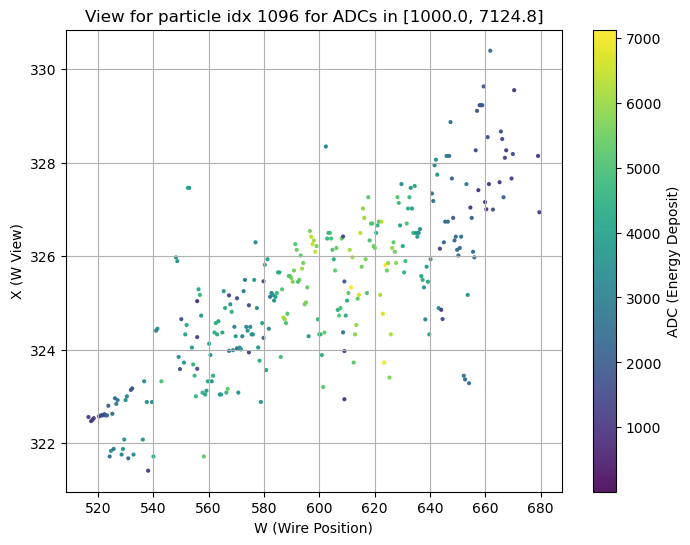

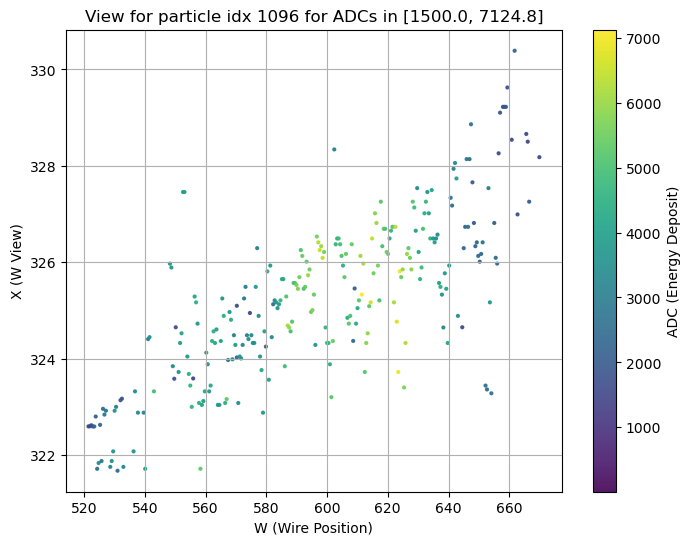

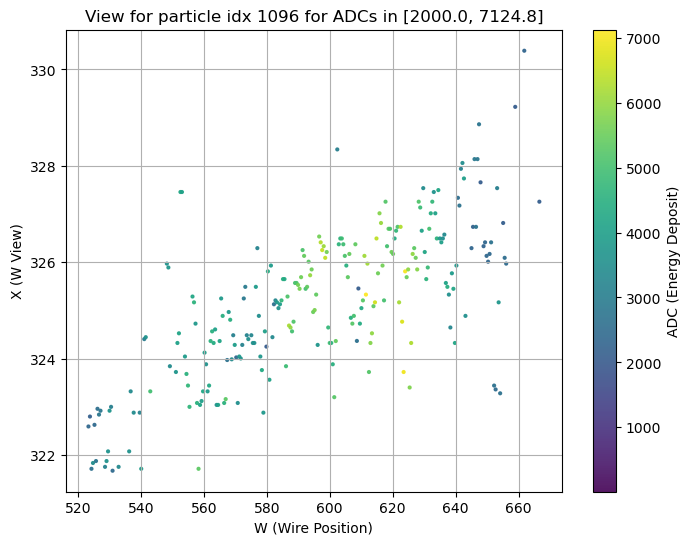

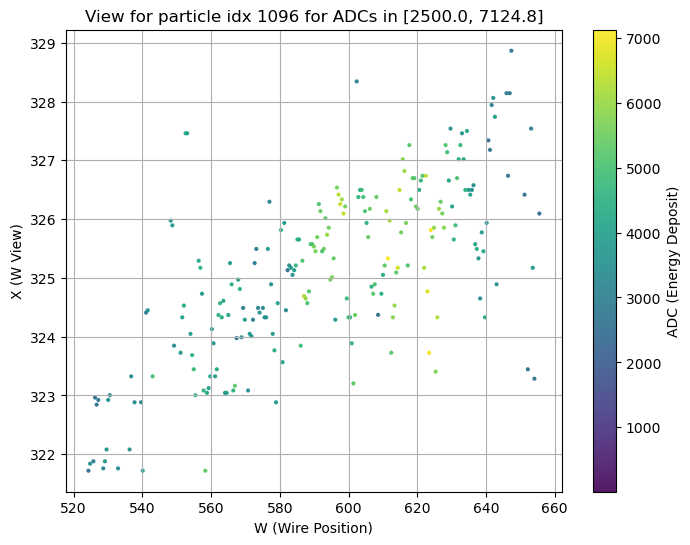

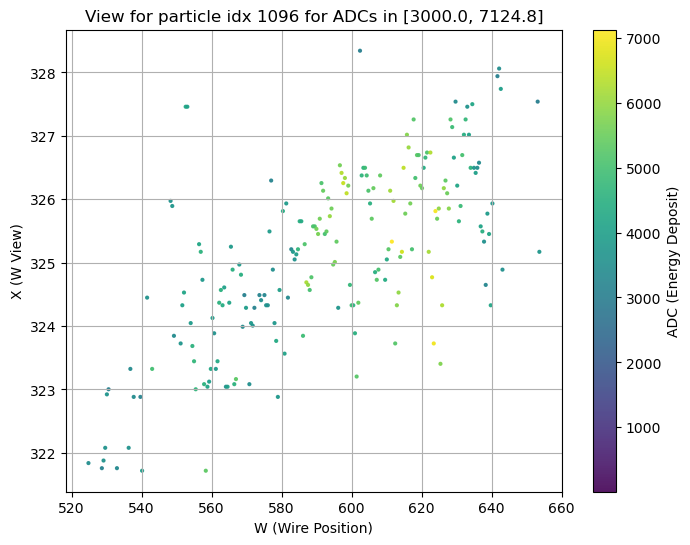

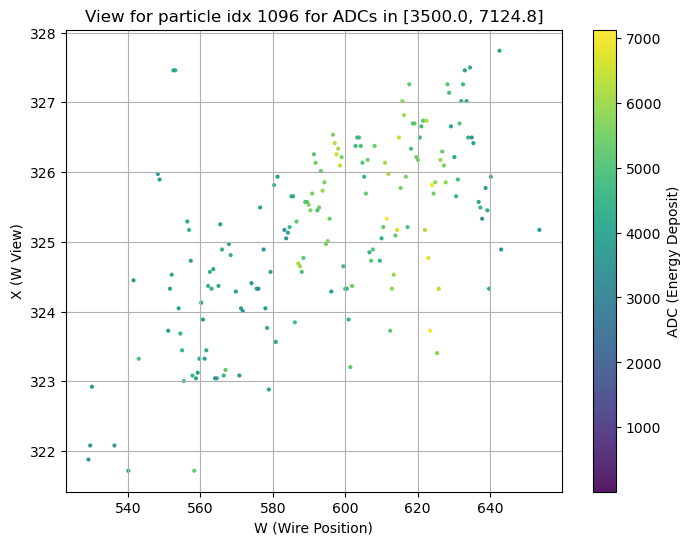

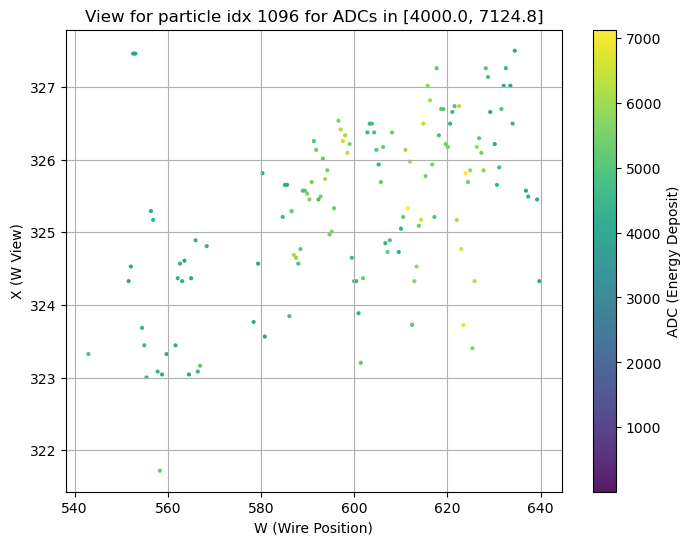

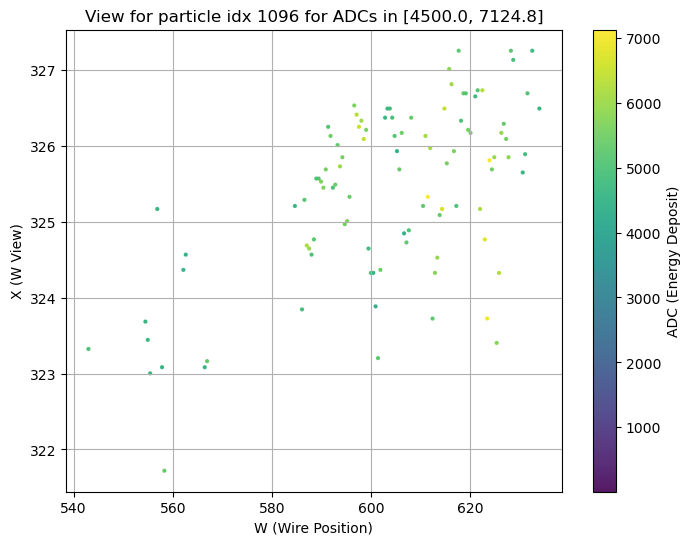

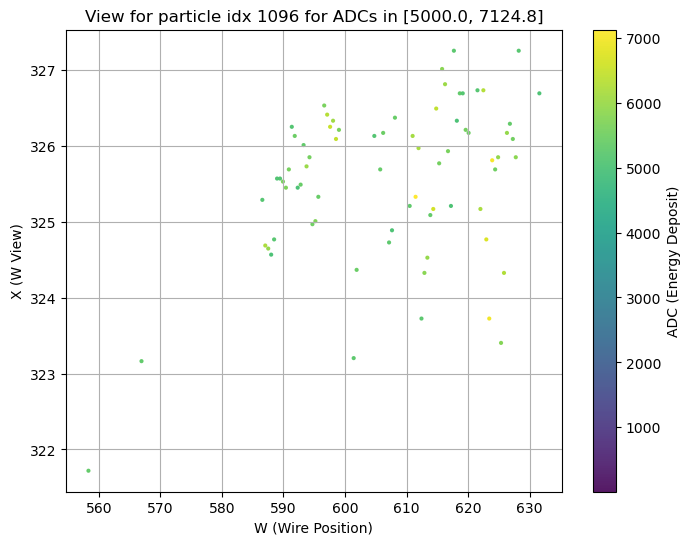

In [5]:
from features import rms

for i in range(9999): # list of good example events
    if rms(events, i, 500) is not None:
        print(f'event {i}: {rms(events, i, 500)}')

for k in np.arange(0, 5001, 500):
    plot_idx_adc_bounded(events, 1096, k, 9000)

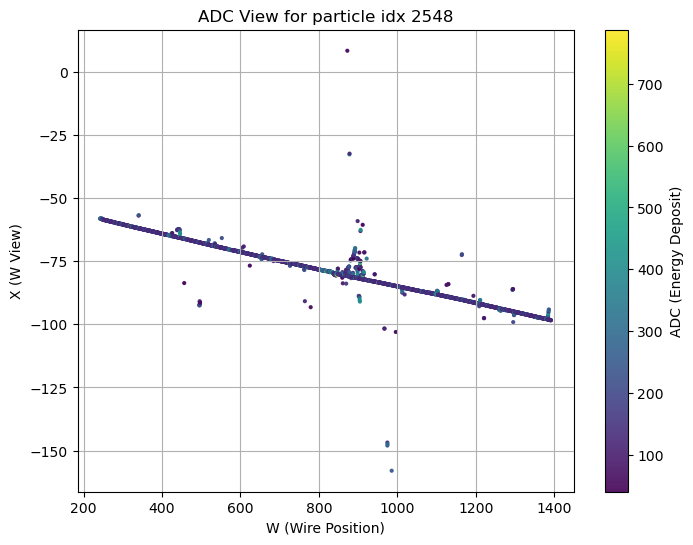

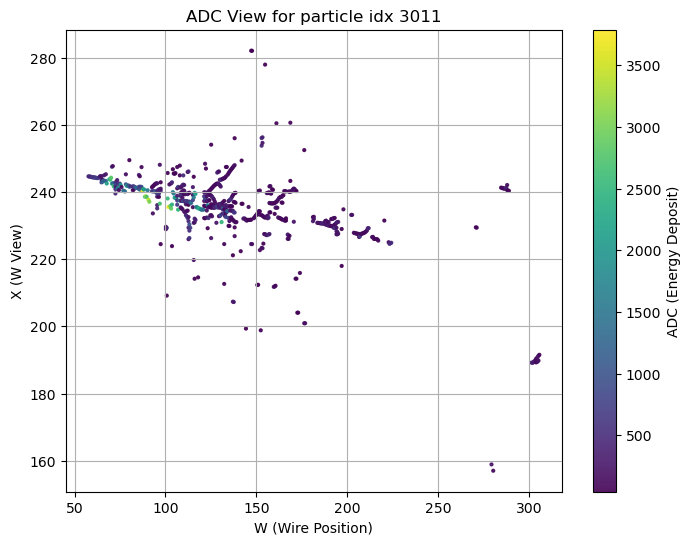

In [6]:
def plot_idx_adc(events, event_idx):
    
    # finding x/w hits again for a single event
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    adc_values = events.reco_adcs_w[event_idx]

    if len(w_hits) == len(x_hits) and len(w_hits) > 5:
        plt.figure(figsize = (8,6))
        scatter = plt.scatter(w_hits, x_hits, c=adc_values, cmap='viridis', s=4, alpha=0.9) # scatter plot
        plt.colorbar(scatter, label='ADC (Energy Deposit)') # Generating Colour Bar
        plt.title(f'ADC View for particle idx {event_idx}')
        plt.ylabel('X (W View)')
        plt.xlabel('W (Wire Position)')
        plt.grid(True)
        plt.show()
    else: return print('Less that 5 hits in event, not sufficient to plot.')

plot_idx_adc(events, 2548)
plot_idx_adc(events, 3011)

adc_min is too low, minimum for event 6225 is 36.305110931396484:


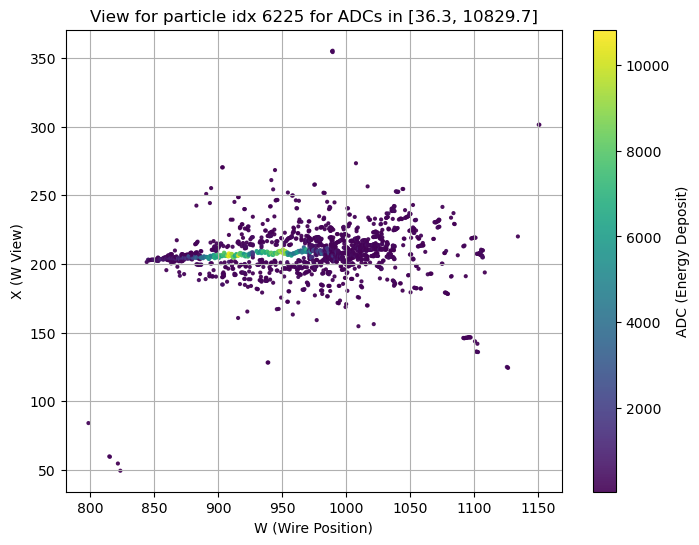

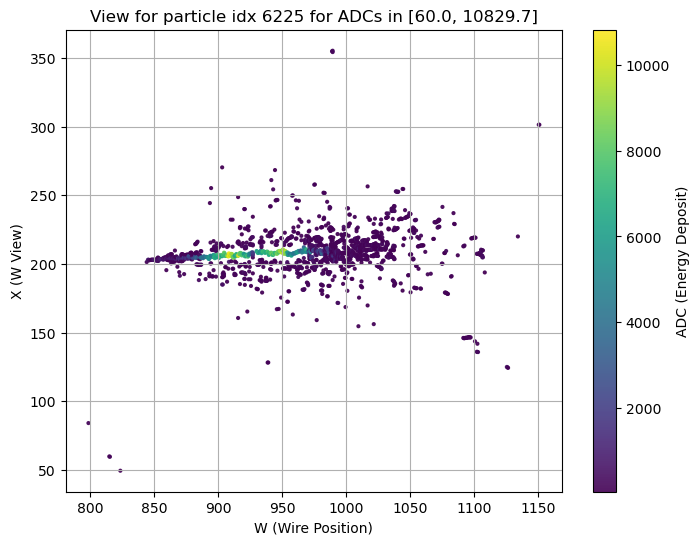

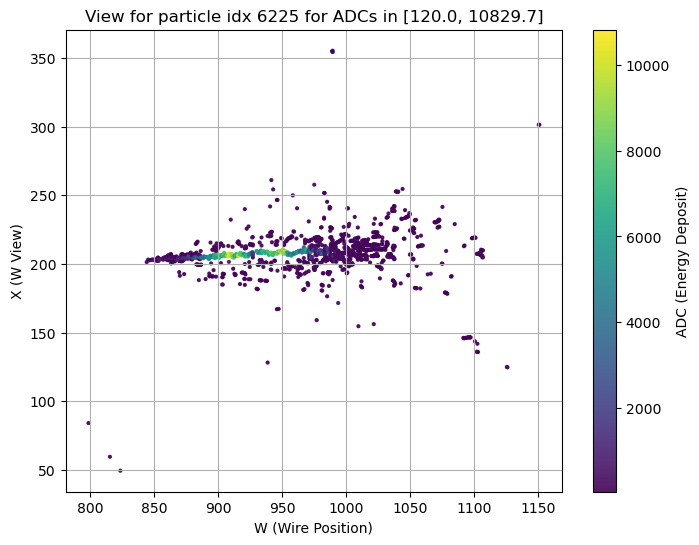

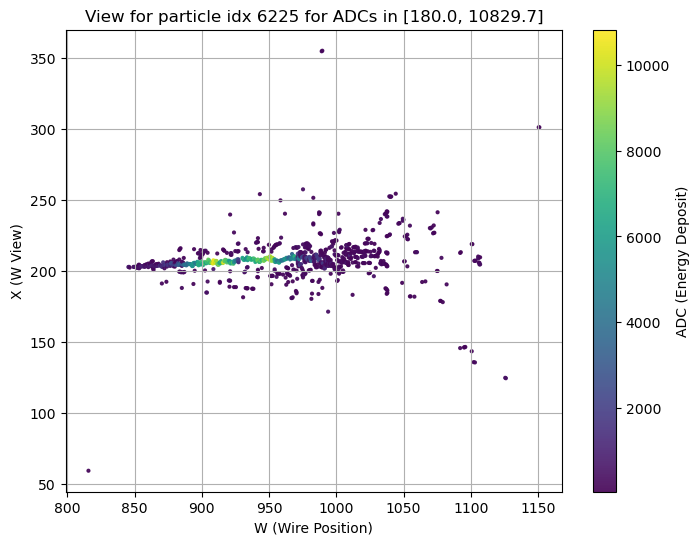

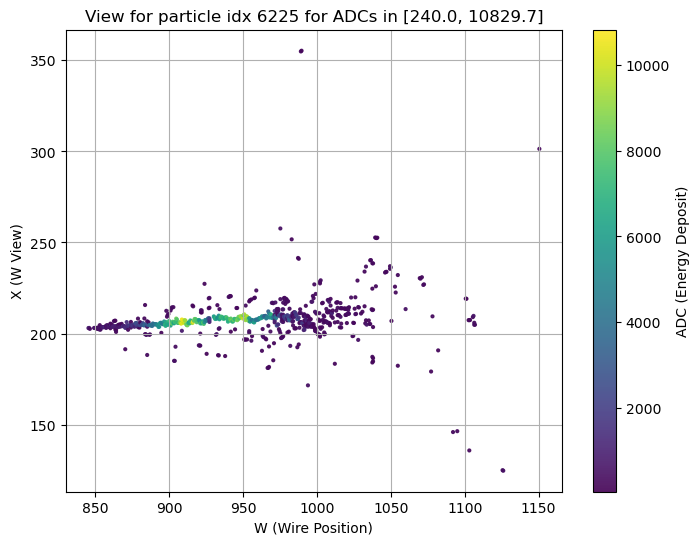

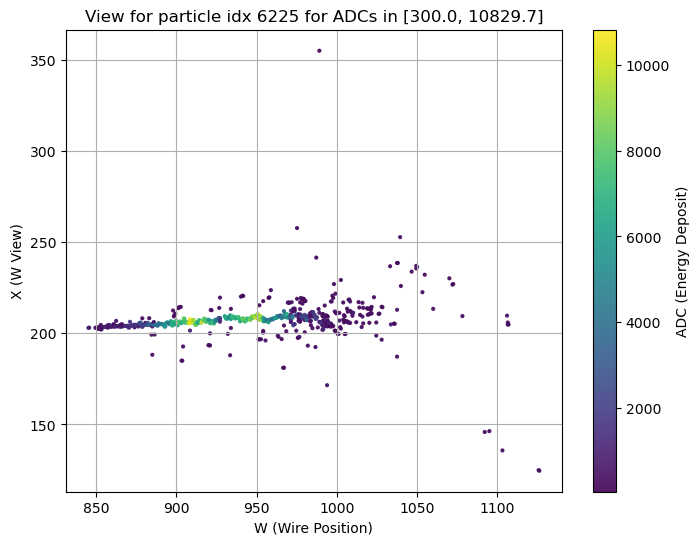

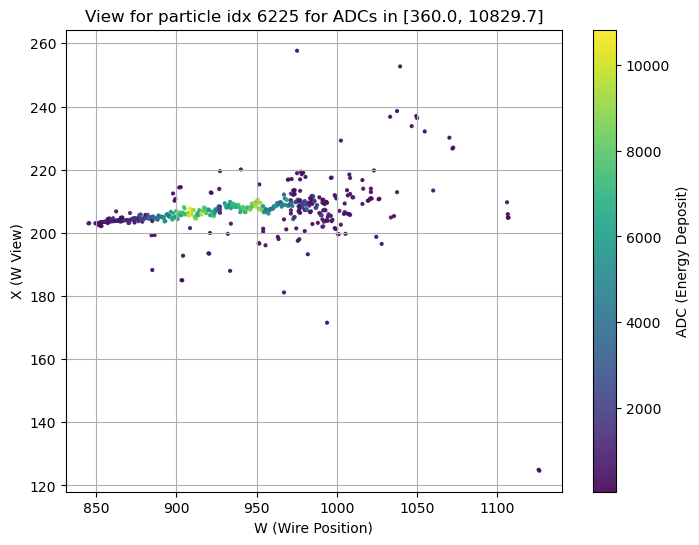

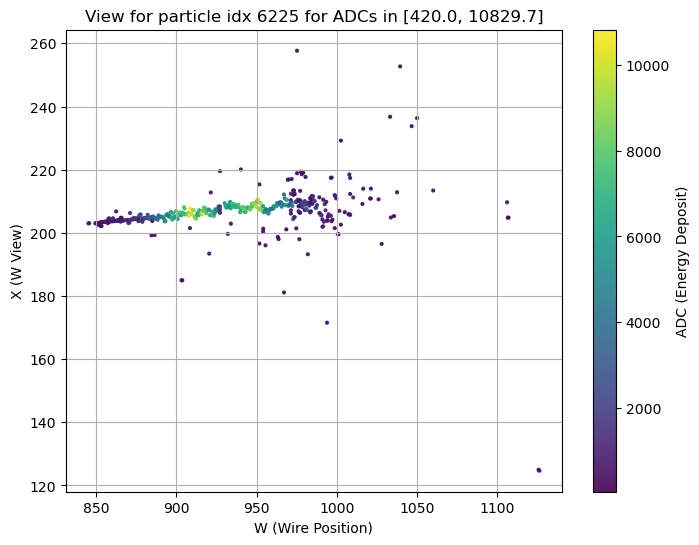

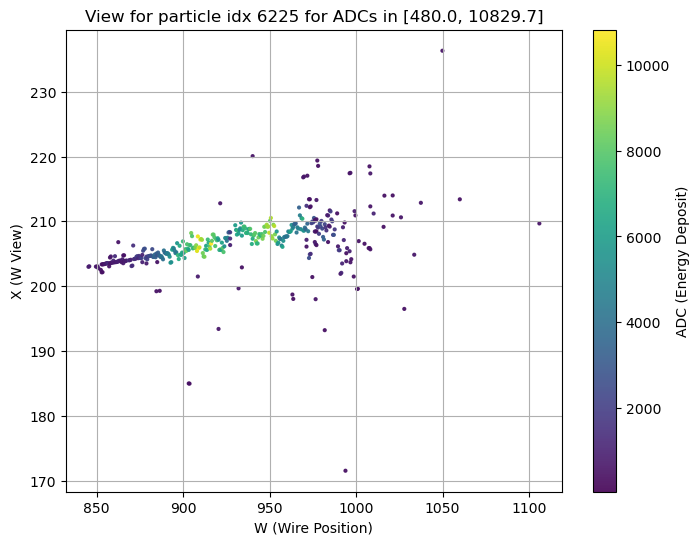

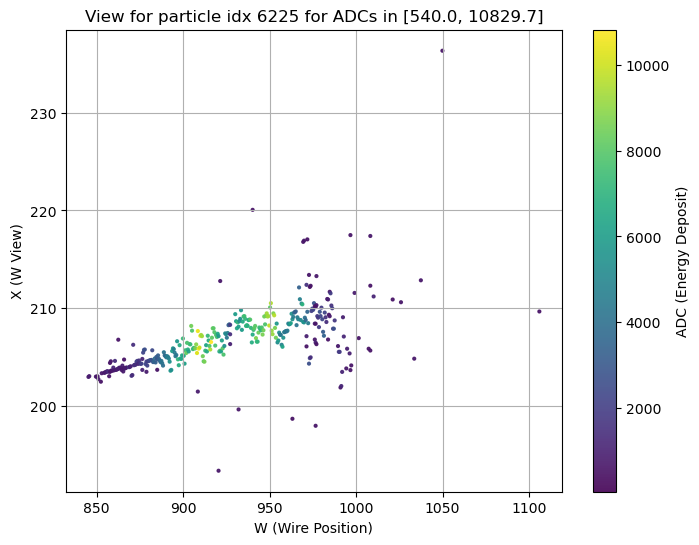

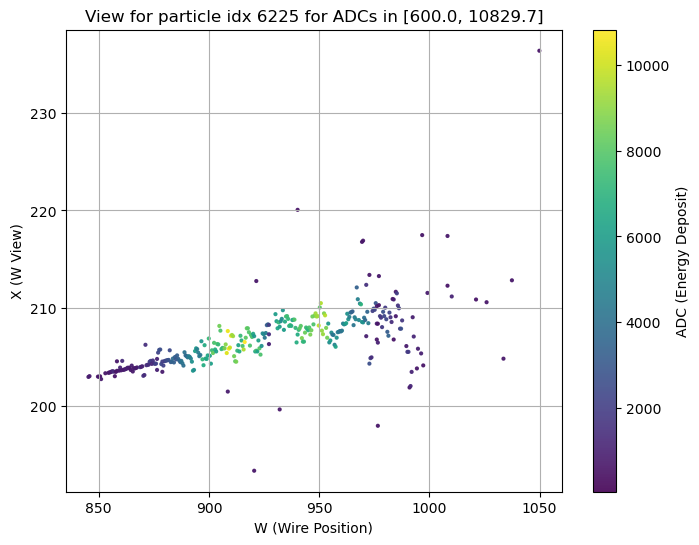

In [7]:
def plot_idx_adc_min(events, event_idx, adc_min): # our way of visualising filtering out adcs from the bottom
    
    # Finding x/w hits and ADC values for a single event
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    adc_values = events.reco_adcs_w[event_idx]

    if min(adc_values) > adc_min:
        adc_min = min(adc_values)
        print(f'adc_min is too low, minimum for event {event_idx} is {adc_min}:')

    adc_mask = (adc_values >= adc_min)
    
    # Apply the mask to w_hits, x_hits, and adc_values
    filtered_w_hits = w_hits[adc_mask]
    filtered_x_hits = x_hits[adc_mask]
    filtered_adc_values = adc_values[adc_mask]

    # Plot if there are sufficient hits after filtering
    if len(filtered_w_hits) == len(filtered_x_hits) and len(filtered_w_hits) > 5:
        plt.figure(figsize=(8,6))
        scatter = plt.scatter(filtered_w_hits, filtered_x_hits, c=filtered_adc_values, cmap='viridis', s=4, alpha=0.9, vmin=min(adc_values), vmax=max(adc_values)) # Scatter plot
        plt.colorbar(scatter, label='ADC (Energy Deposit)') # Generating Color Bar
        plt.title(f'View for particle idx {event_idx} for ADCs in [{adc_min:.1f}, {max(adc_values):.1f}]')
        plt.ylabel('X (W View)')
        plt.xlabel('W (Wire Position)')
        plt.grid(True)
        plt.show()
    else:
        print('Less than 5 hits in event, not sufficient to plot.')

for i in np.arange(0, 601, 60):
    plot_idx_adc_min(events, 6225, i)

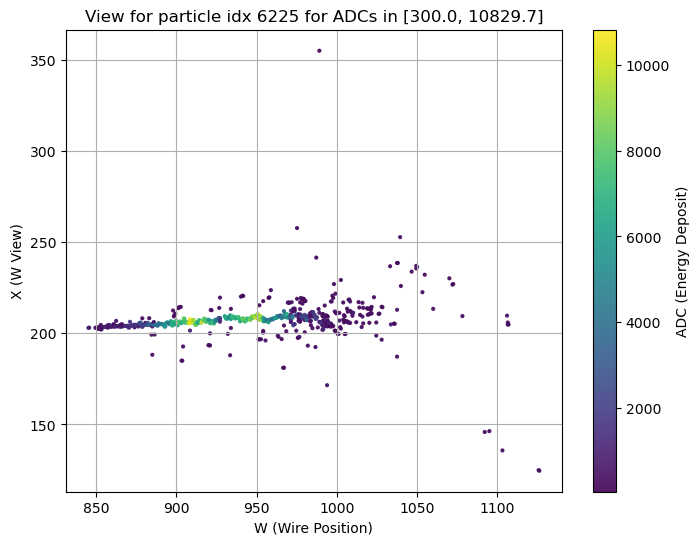

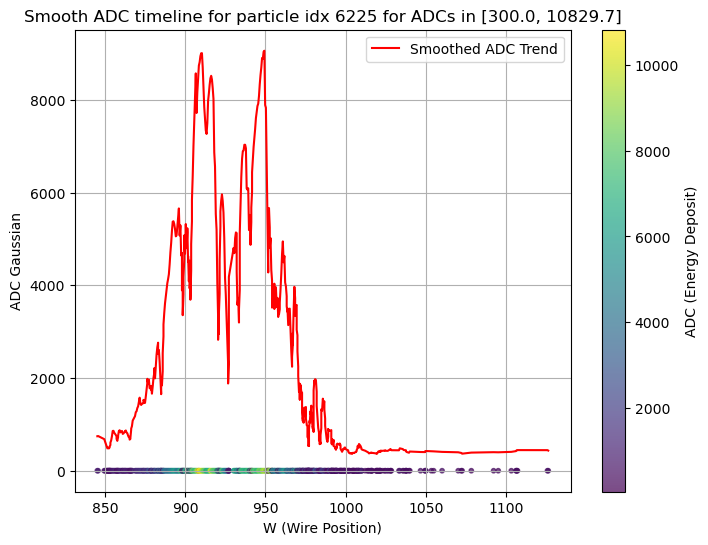

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def plot_idx_adc_min_with_smoothing(events, event_idx, adc_min, sigma):  # sigma controls the smoothness of the line

    # Finding x/w hits and ADC values for a single event
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    adc_values = events.reco_adcs_w[event_idx]

    # Check and adjust adc_min
    if min(adc_values) > adc_min:
        adc_min = min(adc_values)
        print(f'adc_min is too low, minimum for event {event_idx} is {adc_min}:')

    # Apply ADC filter
    adc_mask = (adc_values >= adc_min)
    filtered_w_hits = w_hits[adc_mask]
    filtered_x_hits = x_hits[adc_mask]
    filtered_adc_values = adc_values[adc_mask]

    # Plot if there are sufficient hits after filtering
    if len(filtered_w_hits) == len(filtered_x_hits) and len(filtered_w_hits) > 5:
        plt.figure(figsize=(8, 6))
        
        # Scatter plot for filtered data
        scatter = plt.scatter(filtered_w_hits, filtered_x_hits*0, c=filtered_adc_values, cmap='viridis', s=10, alpha=0.7, vmin=min(adc_values), vmax=max(adc_values))
        plt.colorbar(scatter, label='ADC (Energy Deposit)')
        
        # Smoothing and plotting the ADC trend over W
        sorted_indices = np.argsort(filtered_w_hits)
        sorted_w_hits = filtered_w_hits[sorted_indices]
        sorted_adc_values = filtered_adc_values[sorted_indices]
        
        # Apply Gaussian smoothing to the ADC values
        smoothed_adc_values = gaussian_filter1d(sorted_adc_values, sigma=sigma)
        
        # Plot the smoothed line
        plt.plot(sorted_w_hits, smoothed_adc_values, color='red', linewidth=1.5, label='Smoothed ADC Trend')
        
        # Plot labels and title
        plt.title(f'Smooth ADC timeline for particle idx {event_idx} for ADCs in [{adc_min:.1f}, {max(adc_values):.1f}]')
        plt.ylabel('ADC Gaussian')
        plt.xlabel('W (Wire Position)')
        plt.grid(True)
        plt.legend()
        plt.show()
    else: print('Less than 5 hits in event, not sufficient to plot.')

plot_idx_adc_min(events, 6225, 300)
plot_idx_adc_min_with_smoothing(events, 6225, 300, sigma=2)

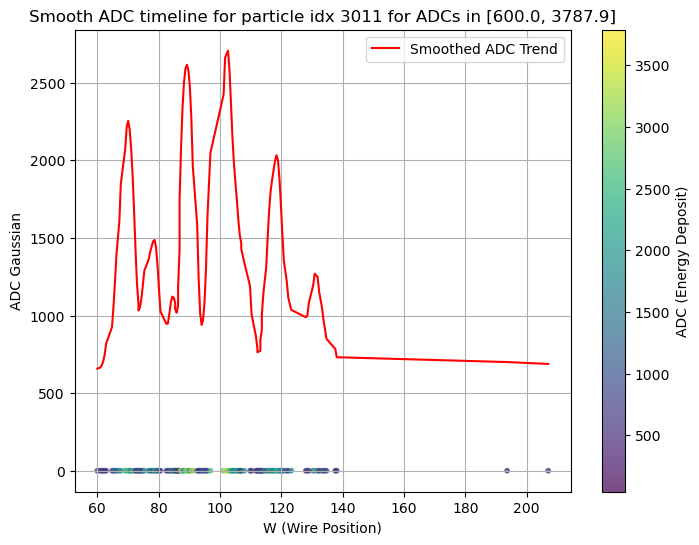

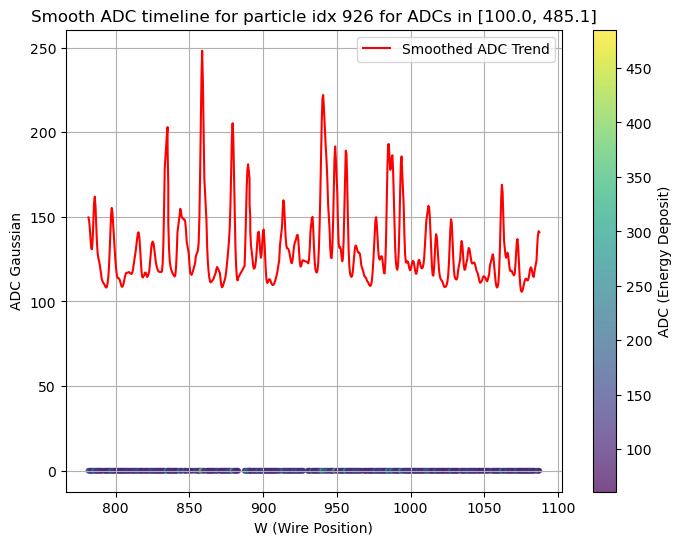

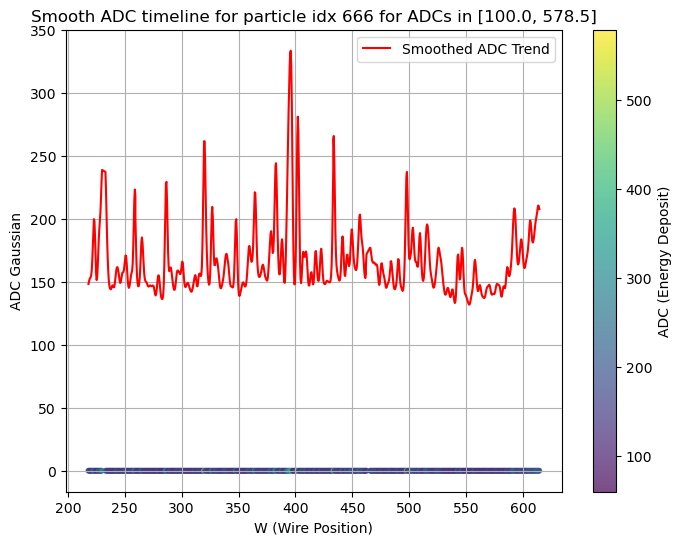

In [9]:
''' Using what we have discovered from the RMS Histograms to have a look at some known tracks and showers '''

plot_idx_adc_min_with_smoothing(events, 3011, 600, sigma=2) # shower
plot_idx_adc_min_with_smoothing(events, 926, 100, sigma=2) # track
plot_idx_adc_min_with_smoothing(events, 666, 100, sigma=2) # RMS model was less sure

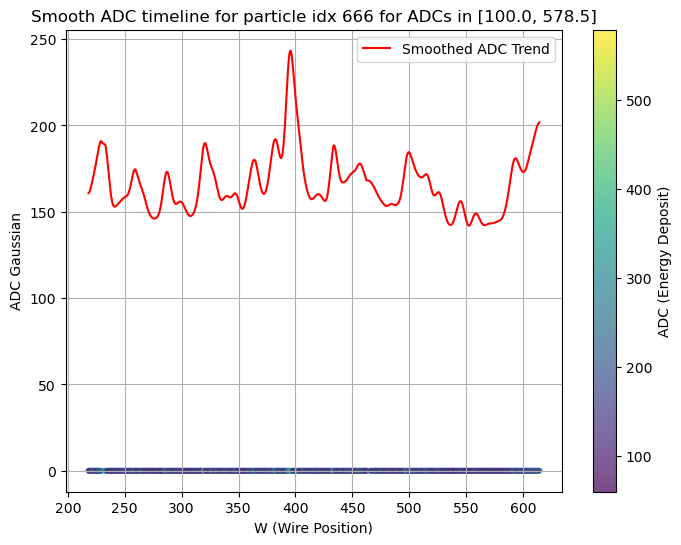

In [10]:
plot_idx_adc_min_with_smoothing(events, 666, 100, sigma=7) # looking at sigma=7 to see what happens for smoother plots

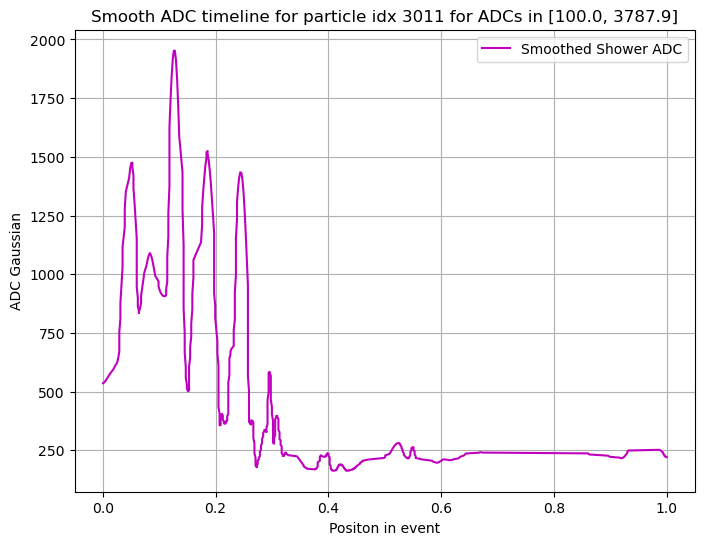

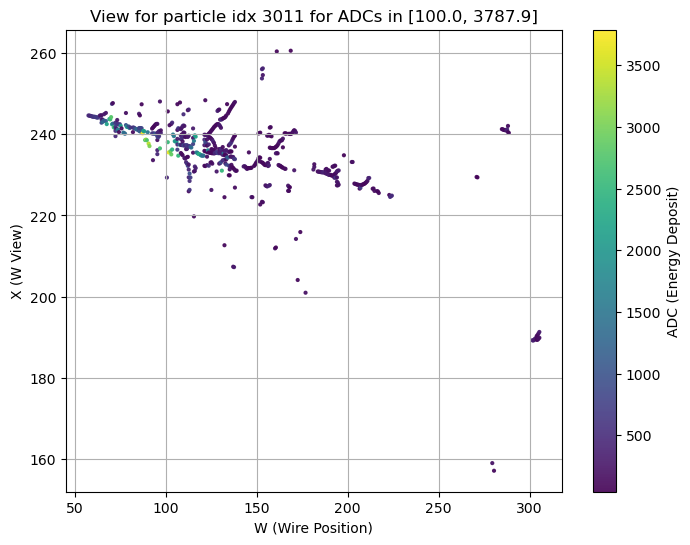

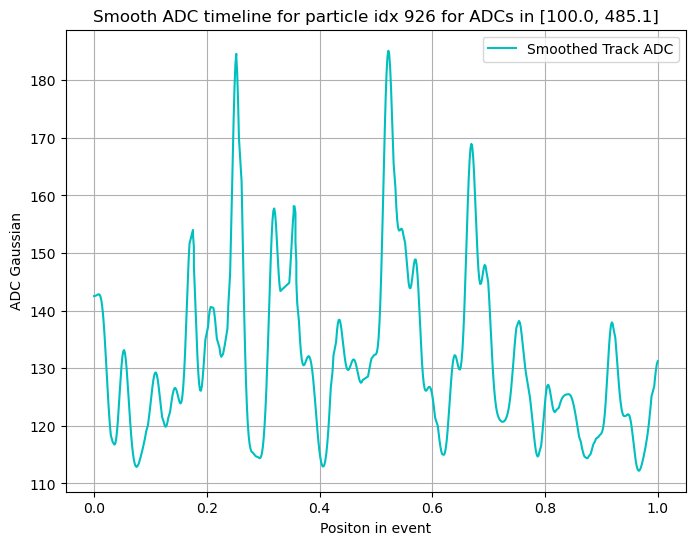

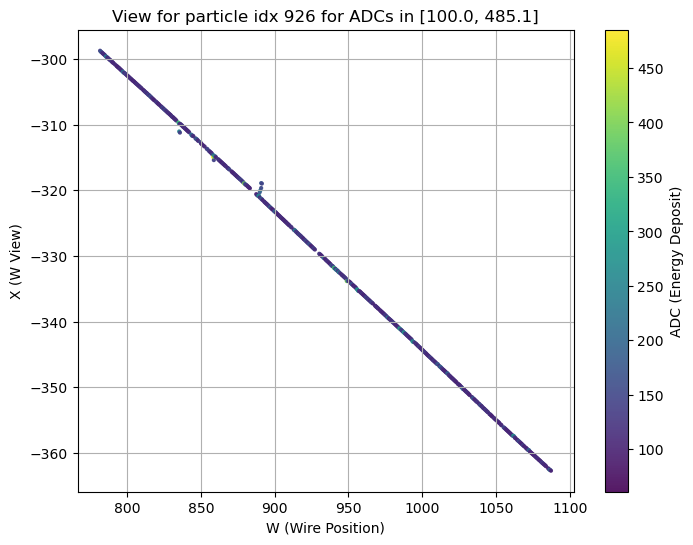

In [11]:
# pick a sigma say 5 for example, will then plot lots of adcs on a graph, will also need a track or shower mask:
shower_mask = [-11, 11, 22]

def smooth_adc_plot_pdg(events, event_idx, adc_min, sigma):
    # Finding x/w hits and ADC values for a single event
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    adc_values = events.reco_adcs_w[event_idx]

    # filtering track or shower from pdg code
    pdg = events.mc_pdg[event_idx]
    track_or_shower = None # initialising the track or shower variable
    line_colour = None
    
    if pdg in shower_mask:
        track_or_shower = 'Shower'
        line_colour = 'm'
    else: 
        track_or_shower = 'Track'
        line_colour = 'c'
    
    # Check and adjust adc_min
    if min(adc_values) > adc_min:
        adc_min = min(adc_values)

    # Apply ADC filter
    adc_mask = (adc_values >= adc_min)
    filtered_w_hits = w_hits[adc_mask]
    filtered_x_hits = x_hits[adc_mask]
    filtered_adc_values = adc_values[adc_mask]

    # Plot if there are sufficient hits after filtering
    if len(filtered_w_hits) == len(filtered_x_hits) and len(filtered_w_hits) > 5:
        plt.figure(figsize=(8, 6))
        
        # Smoothing and plotting the ADC trend over W
        sorted_indices = np.argsort(filtered_w_hits)
        sorted_w_hits = filtered_w_hits[sorted_indices]
        sorted_adc_values = filtered_adc_values[sorted_indices]
        
        # Apply Gaussian smoothing to the ADC values
        smoothed_adc_values = gaussian_filter1d(sorted_adc_values, sigma=sigma)

        # invert w hits if the event goes to the left
        w_vertex = events.reco_particle_vtx_w[event_idx]
        avg_w = sum(w_hits)/len(w_hits)
        if avg_w < w_vertex:
            sorted_w_hits = sorted_w_hits[::-1]
    
        # move and squash filtered w hits
        sorted_w_hits = [x - min(sorted_w_hits) for x in sorted_w_hits]
        sorted_w_hits = [x/max(sorted_w_hits) for x in sorted_w_hits]
        
        # Plot the smoothed line
        plt.plot(sorted_w_hits, smoothed_adc_values, color=line_colour, linewidth=1.5, label=f'Smoothed {track_or_shower} ADC')
        
        # Plot labels and title
        plt.title(f'Smooth ADC timeline for particle idx {event_idx} for ADCs in [{adc_min:.1f}, {max(adc_values):.1f}]')
        plt.ylabel('ADC Gaussian')
        plt.xlabel('Positon in event')
        plt.grid(True)
        plt.legend()
        plt.show()
    else: print('Less than 5 hits in event, not sufficient to plot.')

smooth_adc_plot_pdg(events, 3011, 100, 5)
plot_idx_adc_min(events, 3011, 100)
smooth_adc_plot_pdg(events, 926, 100, 5)
plot_idx_adc_min(events, 926, 100)

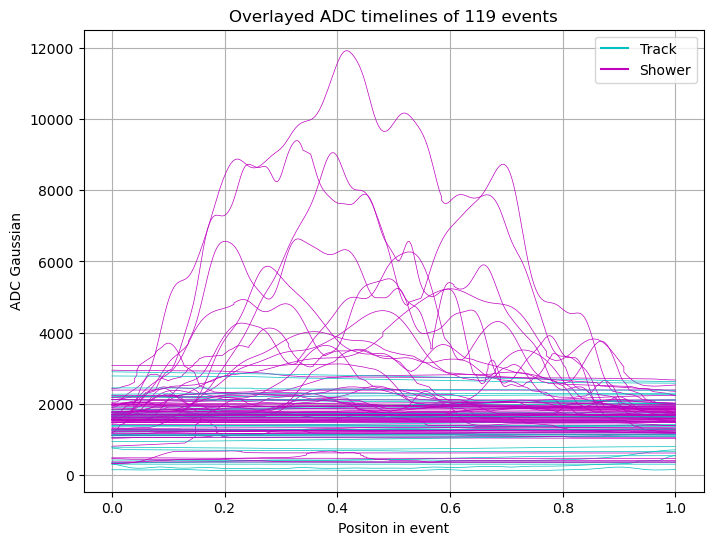

In [12]:
# Now we try and plot a few events on one plot.

def pdg_adc_standardised_w(events, start_idx, end_idx, adc_min, hits_cutoff, sigma):
    plt.figure(figsize=(8, 6))
    plt.plot([], [], color='c', label='Track')
    plt.plot([], [], color='m', label='Shower')
    
    n = 0 # Simply a particle counter
    
    for event_idx in range(start_idx, end_idx + 1):
    
        # Finding x/w hits and ADC values for a single event
        w_hits = events.reco_hits_w[event_idx]
        x_hits = events.reco_hits_x_w[event_idx]

        if len(w_hits) > hits_cutoff or len(x_hits) > hits_cutoff:
            
            adc_values = events.reco_adcs_w[event_idx]
        
            # filtering track or shower from pdg code
            pdg = events.mc_pdg[event_idx]
            track_or_shower = None # initialising the track or shower variable
            line_colour = None
            
            if pdg in [-11, 11, 22]:
                track_or_shower = 'Shower'
                line_colour = 'm'
            else: 
                track_or_shower = 'Track'
                line_colour = 'c'
            
            # Check and adjust adc_min
            if min(adc_values) > adc_min:
                adc_min = min(adc_values)
        
            # Apply ADC filter
            adc_mask = (adc_values >= adc_min)
            filtered_w_hits = w_hits[adc_mask]
            filtered_x_hits = x_hits[adc_mask]
            filtered_adc_values = adc_values[adc_mask]
        
            # Plot if there are sufficient hits after filtering
            if len(filtered_w_hits) == len(filtered_x_hits) and len(filtered_w_hits) > 5:
                
                # Smoothing and plotting the ADC trend over W
                sorted_indices = np.argsort(filtered_w_hits)
                sorted_w_hits = filtered_w_hits[sorted_indices]
                sorted_adc_values = filtered_adc_values[sorted_indices]
                
                # Apply Gaussian smoothing to the ADC values
                smoothed_adc_values = gaussian_filter1d(sorted_adc_values, sigma=sigma)
        
                # invert w hits if the event goes to the left
                w_vertex = events.reco_particle_vtx_w[event_idx]
                avg_w = sum(w_hits)/len(w_hits)
                if avg_w < w_vertex:
                    sorted_w_hits = sorted_w_hits[::-1]
            
                # move and squash filtered w hits
                sorted_w_hits = [x - min(sorted_w_hits) for x in sorted_w_hits]
                sorted_w_hits = [x/max(sorted_w_hits) for x in sorted_w_hits]
                
                # Plot the smoothed line
                plt.plot(sorted_w_hits, smoothed_adc_values, color=line_colour, linewidth=0.5)
                #print(f'success on event {event_idx}')
                n += 1
    
        
    # Plot labels and title
    plt.title(f'Overlayed ADC timelines of {n} events')
    plt.ylabel('ADC Gaussian')
    plt.xlabel('Positon in event')
    plt.grid(True)
    plt.legend()
    plt.show()

pdg_adc_standardised_w(events, 0, 9999, 1, 5, 5)

In [ ]:

def pdg_adc_standardised(events, start_idx, end_idx, adc_min, hits_cutoff, sigma):
    plt.figure(figsize=(8, 6))
    plt.plot([], [], color='c', label='Track')
    plt.plot([], [], color='m', label='Shower')
    
    n = 0 # Simply a particle counter
    
    for event_idx in range(start_idx, end_idx + 1):
    
        # Finding x/w hits and ADC values for a single event
        w_hits = events.reco_hits_w[event_idx]
        x_hits = events.reco_hits_x_w[event_idx]

        if len(w_hits) > hits_cutoff or len(x_hits) > hits_cutoff:
            
            adc_values = events.reco_adcs_w[event_idx]
        
            # filtering track or shower from pdg code
            pdg = events.mc_pdg[event_idx]
            track_or_shower = None # initialising the track or shower variable
            line_colour = None
            
            if pdg in [-11, 11, 22]:
                track_or_shower = 'Shower'
                line_colour = 'm'
            else: 
                track_or_shower = 'Track'
                line_colour = 'c'
            
            # Check and adjust adc_min
            if min(adc_values) > adc_min:
                adc_min = min(adc_values)
        
            # Apply ADC filter
            adc_mask = (adc_values >= adc_min)
            filtered_w_hits = w_hits[adc_mask]
            filtered_x_hits = x_hits[adc_mask]
            filtered_adc_values = adc_values[adc_mask]
        
            # Plot if there are sufficient hits after filtering
            if len(filtered_w_hits) == len(filtered_x_hits) and len(filtered_w_hits) > 5:
                
                # Smoothing and plotting the ADC trend over W
                sorted_indices = np.argsort(filtered_w_hits)
                sorted_w_hits = filtered_w_hits[sorted_indices]
                sorted_adc_values = filtered_adc_values[sorted_indices]

                # Standardise ADCs
                sorted_adc_values = [y - min(sorted_adc_values) for y in sorted_adc_values]
                sorted_adc_values = [y/max(sorted_adc_values) for y in sorted_adc_values]
                
                # Apply Gaussian smoothing to the ADC values
                smoothed_adc_values = gaussian_filter1d(sorted_adc_values, sigma=sigma)
        
                # invert w hits if the event goes to the left
                w_vertex = events.reco_particle_vtx_w[event_idx]
                avg_w = sum(w_hits)/len(w_hits)
                if avg_w < w_vertex:
                    sorted_w_hits = sorted_w_hits[::-1]
            
                # move and squash filtered w hits
                sorted_w_hits = [x - min(sorted_w_hits) for x in sorted_w_hits]
                sorted_w_hits = [x/max(sorted_w_hits) for x in sorted_w_hits]
                
                # Plot the smoothed line
                plt.plot(sorted_w_hits, smoothed_adc_values, color=line_colour, linewidth=0.5)
                #print(f'success on event {event_idx}')
                n += 1
    
        
    # Plot labels and title
    plt.title(f'Standardised ADC timelines of {n} events')
    plt.ylabel('ADC Gaussian')
    plt.xlabel('Positon in event')
    plt.grid(True)
    plt.legend()
    plt.show()

pdg_adc_standardised(events, 0, 9999, 1, 500, 5)

In [ ]:
# So, illustrating the two pieces of data:

pdg_adc_standardised_w(events, 0, 9999, 1, 500, 5)
pdg_adc_standardised(events, 0, 9999, 1, 500, 5)

In [ ]:
cheated_0 = Events("CheatedRecoFile_0.root")

pdg_adc_standardised(cheated_0, 0, 20000, 1, 500, 5)

In [ ]:
def adc_max_hist(events, start_idx, end_idx, hits_cutoff):

    if hits_cutoff < 2:
        hits_cutoff = 2
        print('cannot accept events with less than 2 hits')
    # define an array for the max values that we will plot with eventually
    max_array_shower = []
    max_array_track = []

    # add a counter for the fails and successes, just so the debugging data isnt as invasive
    f = 0
    n = 0
    
    for event_idx in range(start_idx, end_idx + 1):

        # find w positions so we can relate the adc values
        w_hits = events.reco_hits_w[event_idx]

        if len(w_hits) > hits_cutoff:
            
            adc_values = events.reco_adcs_w[event_idx]
        
            # filtering track or shower from pdg code
            pdg = events.mc_pdg[event_idx]
            shower = False # initialising the track or shower variable

            if pdg in [-11, 11, 22]:
                shower = True

            # finding the w value associated with the maximum adc value
            w_idx = np.argmax(adc_values)

            # we are omitting an edge case here that there is a chance there are two identical max values, this will rarely happen though

            # want to scale the w_adc_max value
            w_adc_max = w_hits[w_idx]
            # in the samw way we scale the w hits, translate to origin then squash to [0,1]:

            w_adc_max = (w_adc_max - min(w_hits))/(max(w_hits) - min(w_hits))
            n += 1

            if shower:
                max_array_shower.append(w_adc_max)
            else: max_array_track.append(w_adc_max)

        else: f += 1

    print(f'There were {f} failed indices')
    
    edges = np.linspace(0,1,21)
    plt.figure(figsize=(10,6))
    plt.hist(max_array_track, density=True, color='c', edgecolor='k', bins=edges, linewidth=0.5, alpha=0.7, label='True Track')
    plt.hist(max_array_shower, density=True, color='m', edgecolor='k', bins=edges, linewidth=0.5, alpha=0.7, label='True Shower')
    plt.title(f'ADC Peak histogram for {n} events, cutoff = {hits_cutoff}')
    plt.xlabel('W position in event')
    plt.ylabel('ADC Max density')
    plt.legend()
    plt.grid(False)
    plt.show()

for k in [0, 10, 100, 400, 500, 600, 1000, 1500, 2000]:
    adc_max_hist(cheated_0, 0, 49999, k)

In [ ]:
# now look at avg adc

def adc_mean_hist(events, start_idx, end_idx, hits_cutoff):

    if hits_cutoff < 2:
        hits_cutoff = 2
        print('cannot accept events with less than 2 hits')
    # define an array for the max values that we will plot with eventually
    avg_array_shower = []
    avg_array_track = []

    # add a counter for the fails and successes, just so the debugging data isnt as invasive
    f = 0
    n = 0
    
    for event_idx in range(start_idx, end_idx + 1):

        # find w positions so we can relate the adc values
        w_hits = events.reco_hits_w[event_idx]

        if len(w_hits) > hits_cutoff:
            
            adc_values = events.reco_adcs_w[event_idx]
            w_adc_avg = np.mean(adc_values)
        
            # filtering track or shower from pdg code
            pdg = events.mc_pdg[event_idx]
            shower = False # initialising the track or shower variable

            if pdg in [-11, 11, 22]:
                shower = True

            n += 1

            if shower:
                avg_array_shower.append(w_adc_avg)
            else: avg_array_track.append(w_adc_avg)

        else: f += 1

    print(f'There were {f} failed indices')
    
    edges = np.linspace(0,2500,51)
    plt.figure(figsize=(10,6))
    plt.hist(avg_array_track, density=True, color='c', edgecolor='k', bins=edges, linewidth=0.5, alpha=0.7, label='True Track')
    plt.hist(avg_array_shower, density=True, color='m', edgecolor='k', bins=edges, linewidth=0.5, alpha=0.7, label='True Shower')
    plt.title(f'ADC Peak histogram for {n} events, cutoff = {hits_cutoff}')
    plt.xlabel('W position in event')
    plt.ylabel('Average ADC density')
    plt.legend()
    plt.grid(False)
    plt.show()

adc_mean_hist(cheated_0, 0, 49999, 500)